In [1]:
# Import necessary packages and modules for modeling, metrics, and visualization
from eco_retina import EcoRETINA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Load California housing data (excluding latitude and longitude), define features and target, and split into train/test sets
housing = fetch_california_housing()
X = housing.data[:, :-2]
col_names=housing.feature_names[:-2]
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [3]:
# Define model hyperparameters
con_cols= col_names
dummy_cols=[ ]
cols_index_map = {col: idx for idx, col in enumerate(col_names)}
con_cols_indices = [cols_index_map[col] for col in con_cols]
dummy_cols_indices = [cols_index_map[col] for col in dummy_cols]
max_instances=100000
chunk_size=500
params = [-1.0, -0.5, 0.0, 0.5, 1.0]
cross_dummy=True
max_r2=0.05
grid=0.05
max_reg = 100
seed=8
reg_type='linear'
loss= 'aic'
cov_type='HC0'
model_step=1
confidence=0.99

In [4]:
# Initialize and fit the EcoRETINA model using the specified hyperparameters
eco=EcoRETINA()
eco.fit(y=y_train, X=X_train, con_cols_indices=con_cols_indices, dummy_cols_indices=dummy_cols_indices, col_names=col_names, max_instances=max_instances,
        chunk_size=chunk_size, params=params, cross_dummy=cross_dummy, max_r2=max_r2, grid=grid, max_reg=max_reg, seed=seed, reg_type=reg_type, loss=loss, cov_type=cov_type, model_step=model_step )


[codecarbon WARNING @ 09:37:09] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 09:37:09] [setup] RAM Tracking...
[codecarbon INFO @ 09:37:09] [setup] CPU Tracking...
[codecarbon WARNING @ 09:37:11] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 09:37:11] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-1360P
[codecarbon WARNING @ 09:37:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:37:11] [setup] GPU Tracking...
[codecarbon INFO @ 09:37:11] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 09:37:11] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 09:37:11] >>> Tracker's metada

In [5]:
# Display the statistical summary of the fitted EcoRETINA regression model
eco.sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2955.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        09:37:21   Log-Likelihood:                -18659.
No. Observations:               16512   AIC:                         3.733e+04
Df Residuals:                   16508   BIC:                         3.736e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                     0.3717      0.085      4.388      0.000       0.206       0.538
MedInc * AveOccup^-1.0       1.0947      0.014     78.447      0.000       1.067       1.122
HouseAge * AveOccup^-1.0     0.0275      0.001     20.847      0.000       0.025       0.030
MedInc^-0.5 * AveRooms      -0.0460      0.024     -1.908      0.056      -0.093       0.001
==============================================================================
Omnibus:                     2471.957   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12776.877
Skew:                           0.627   Prob(JB):                         0.00
Kurtosis:                       7.123   Cond. No.                         44.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [6]:
# Load and display the CodeCarbon emissions report generated during model training
eco.load_emissions_report()

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2025-05-03T19:04:24,Eco-RETINA,71054cfb-ea2d-4343-99af-b792963d797d,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,3.900861,0.000045,0.000012,224.0,5.028277,10.0,...,16,13th Gen Intel(R) Core(TM) i7-1360P,1,1 x NVIDIA GeForce MX550,-3.709,40.4697,15.680237,process,N,1.0
1,2025-05-03T20:02:16,Eco-RETINA,7830da8c-a934-4ad1-a752-1c7b2a0057e6,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,4.396731,0.000051,0.000012,224.0,4.182552,10.0,...,16,13th Gen Intel(R) Core(TM) i7-1360P,1,1 x NVIDIA GeForce MX550,-3.709,40.4697,15.680237,process,N,1.0
2,2025-05-03T20:10:53,Eco-RETINA,fcc91884-386f-4174-aefe-77aaa8008e21,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,4.358743,0.000050,0.000012,224.0,4.171979,10.0,...,16,13th Gen Intel(R) Core(TM) i7-1360P,1,1 x NVIDIA GeForce MX550,-3.709,40.4697,15.680237,process,N,1.0
3,2025-05-03T20:18:31,Eco-RETINA,9b20da02-4656-4d94-a92f-b98c43630569,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,0.257286,0.000003,0.000011,224.0,3.989199,10.0,...,16,13th Gen Intel(R) Core(TM) i7-1360P,1,1 x NVIDIA GeForce MX550,-3.709,40.4697,15.680237,process,N,1.0
4,2025-05-04T08:57:19,Eco-RETINA,2974b31d-dd8d-49fa-9f42-736dc6ead5bf,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.183754,0.000054,0.000010,224.0,0.000000,10.0,...,16,13th Gen Intel(R) Core(TM) i7-1360P,1,1 x NVIDIA GeForce MX550,-3.709,40.4697,15.680237,process,N,1.0


In [6]:
# Generate predictions with confidence and prediction intervals, compute and print evaluation metrics
y_pred=eco.predict(X_test, confidence=confidence)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

Mean Squared Error (MSE): 0.5627
Mean Absolute Error (MAE): 0.5635
Mean Absolute Percentage Error (MAPE): 0.3622


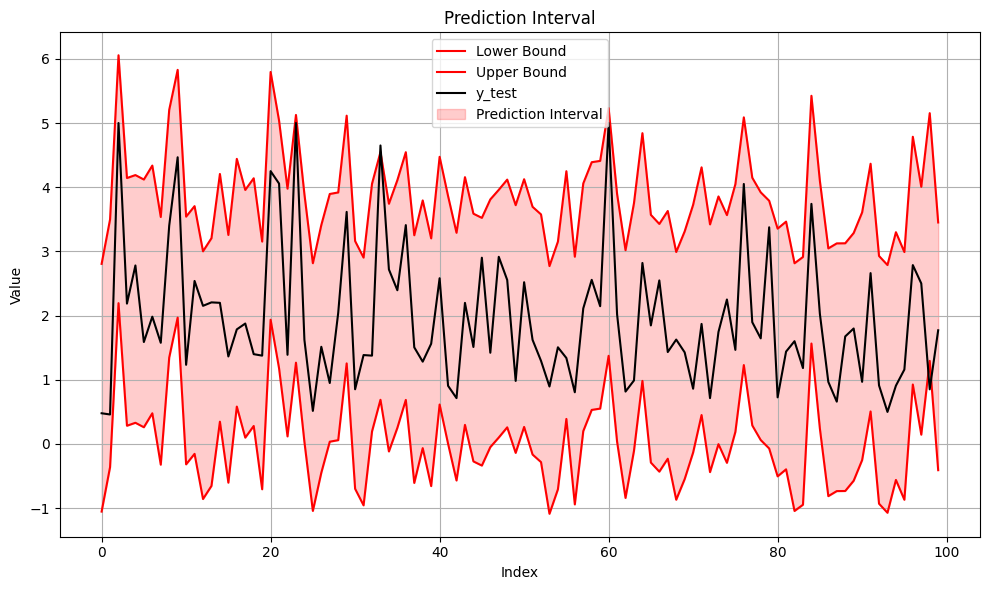

In [7]:
# Plot the prediction intervals and actual target values for the first 100 test samples
test=y_test[0:100]
lower=eco.pi_lower[0:100]
upper=eco.pi_upper[0:100]
x = np.arange(100)  # x-axis based on index

plt.figure(figsize=(10, 6))
plt.plot(x, lower, color='red', label='Lower Bound')
plt.plot(x, upper, color='red', label='Upper Bound')
plt.plot(x, test, color='black', label='y_test')

plt.fill_between(x, lower, upper, color='red', alpha=0.2, label='Prediction Interval')
plt.title('Prediction Interval')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()